# Uncertainty-Aware Road Obstacle Identification

## 1. Imports
Import necessary libraries like pandas PyTorch, torchvision, etc.
Some are commented until they are needed to avoid unnecesary imports.

In [1]:
# Core Libraries
import os
#import numpy as np
import pandas as pd
from pathlib import Path

# Image Processing
import cv2
import matplotlib.pyplot as plt

# Machine Learning and Deep Learning
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset

# Progress Bars for Training
from tqdm.notebook import tqdm

# Utility Functions
#import random
#import json
#import glob

# Custom Libraries
from pipeline.data_loader import CityscapesDataset
from pipeline.preprocess import get_default_transforms

#### Test the imports and dataset

In [2]:
from pipeline.data_loader import CityscapesDataset
from pipeline.preprocess import get_default_transforms

CITYSCAPES_DATASET_ROOT = "/Users/enriquef/Documents/Code/EMAI/Sapienza/ComputerVision/maybe-obstacle/data/cityscapes"
transforms = get_default_transforms()

# Create the dataset
cityscapes_train_dataset = CityscapesDataset(
    root_dir=CITYSCAPES_DATASET_ROOT, 
    split="train", 
    img_transform=transforms, 
    lbl_transform=None  # Add label transforms if needed
)

print(f"Number of samples: {len(cityscapes_train_dataset)}")

# Test a single sample
sample_image, sample_label = cityscapes_train_dataset[0]
print(f"Image shape: {sample_image.shape}")
print(f"Label shape: {sample_label.shape}")

Loaded 2975 train samples with label type 'labelIds'.
Number of samples: 2975
Image shape: torch.Size([3, 256, 512])
Label shape: (1024, 2048)


### Sanity Check
Verify images and labels match.

⚠️ Mismatch: 2975 images vs 11901 labels in train


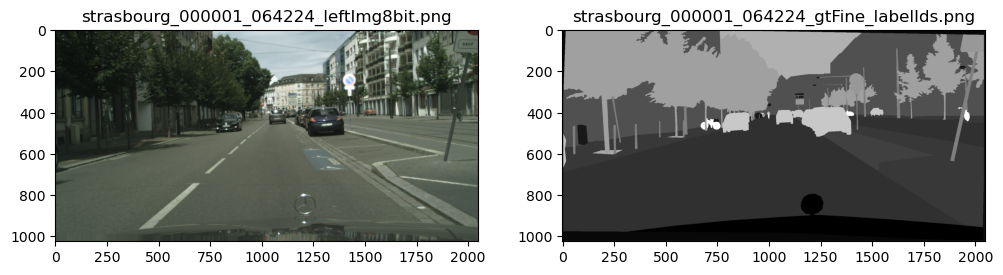

Sanity check completed.
⚠️ Mismatch: 500 images vs 2001 labels in val


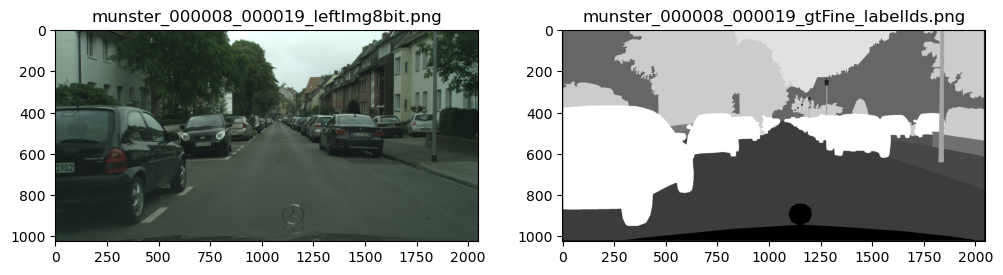

Sanity check completed.
⚠️ Mismatch: 1525 images vs 6101 labels in test


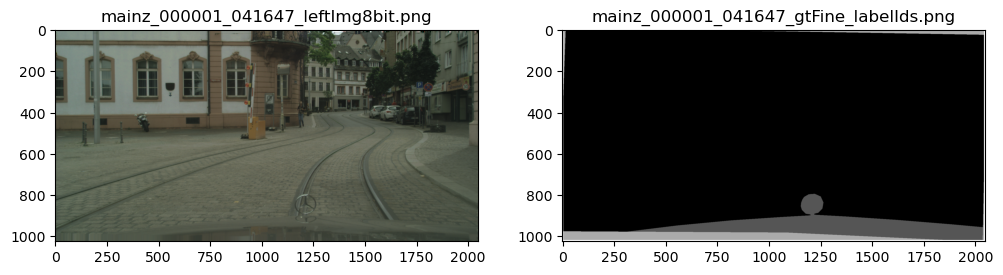

Sanity check completed.


In [5]:
import os
import random
import matplotlib.pyplot as plt
import cv2
import torch
from torchvision.transforms import ToTensor

def sanity_check(root_dir, split="test", num_samples=3):
    image_dir = os.path.join(root_dir, split, "images")
    label_dir = os.path.join(root_dir, split, "labels")

    # Get all image and label files
    image_files = sorted(os.listdir(image_dir))
    label_files = sorted(os.listdir(label_dir))

    # Check that the number of images matches the number of labels
    if len(image_files) != len(label_files):
        print(f"⚠️ Mismatch: {len(image_files)} images vs {len(label_files)} labels in {split}")
    else:
        print(f"✅ {split.capitalize()} set: {len(image_files)} images and labels match.")

    # Randomly sample a few files to check
    for _ in range(num_samples):
        image_file = random.choice(image_files)
        label_file = image_file.replace("_leftImg8bit.png", "_gtFine_labelIds.png")

        # Check if the label file exists
        if not os.path.exists(os.path.join(label_dir, label_file)):
            print(f"❌ Missing label for image {image_file}")
            continue

        # Load the image and label
        image_path = os.path.join(image_dir, image_file)
        label_path = os.path.join(label_dir, label_file)

        image = cv2.imread(image_path)
        label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)

        # Check if the dimensions match
        if image.shape[:2] != label.shape[:2]:
            print(f"❌ Dimension mismatch: {image_file} ({image.shape}) vs {label_file} ({label.shape})")
            continue

        # Plot the image and label
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.title(image_file)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        plt.subplot(1, 2, 2)
        plt.title(label_file)
        plt.imshow(label, cmap="gray")

        plt.show()

    print("Sanity check completed.")

# Run the sanity check for train, val, and test (Change paths accordingly to your cityscapes dataset paths)
CITYSCAPES_DATASET_ROOT = "/Users/enriquef/Documents/Code/EMAI/Sapienza/ComputerVision/maybe-obstacle/data/cityscapes"
sanity_check(CITYSCAPES_DATASET_ROOT, split="train", num_samples=1)
sanity_check(CITYSCAPES_DATASET_ROOT, split="val", num_samples=1)
sanity_check(CITYSCAPES_DATASET_ROOT, split="test", num_samples=1)

## 2. Globals
Define global variables such as paths, batch size, learning rate, etc.

In [16]:
# Global variables
DATASET_PATH = "./datasets/"
BATCH_SIZE = 32
LEARNING_RATE = 0.001
EPOCHS = 50

# Select the best available device (CPU, CUDA, or MPS (Metal Performance Shaders for macOS))
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using CUDA device: {torch.cuda.get_device_name(0)}")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using MPS (Metal Performance Shaders) device")
else:
    device = torch.device("cpu")
    print("Using CPU")
DEVICE = device

Using MPS (Metal Performance Shaders) device


## 3. Utils
Helper functions for visualization, preprocessing, and more.

In [ ]:

def visualize_sample(image, mask):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Image")
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    plt.title("Mask")
    plt.imshow(mask)
    plt.show()


## 4. Data
Load and preprocess datasets like Cityscapes, LostAndFound, and Fishyscapes.

In [ ]:
# Code for data loading and preprocessing

## 5. Network
Define the neural network architecture for semantic segmentation.

In [ ]:
# Define the model architecture here

## 6. Train
Implement the training loop, including loss functions and optimizers.

In [ ]:
# Training loop and loss computation

## 7. Test
Test the trained model and evaluate performance metrics.

In [3]:
# Evaluation metrics and performance analysis